PCA uses linear transfomation to reduce the dimensions of our dataset. And as a bonus, because PCA transforms the data by exploring ‘linear’ covariances between the variables it can also be used as an anomaly detector. Because any recipe that doesn’t follow the ‘structure’ of the initial dataset, won’t transform well.

6714 ingredients -> 6714 columns. When one ingredient is present in a recipe, its column goes to 1. All the rest stays as a 0. In average only 10 of those columns will be ‘active’ in each row. This code will create the “transformer”, that will get an ingredient and output its vector representation. Following code gives us an encoder that will get a ingredient (string) as input and output its vector representation. The final vector containing all the recipe’s ingredients will be the result of a ‘logical or’ on every one of those ingredient vectors.

Total number of recipes: 39774
Number of cuisines: 20
Cuisine count map: 

          greek: 1175
    southern_us: 4320
       filipino: 755
         indian: 3003
       jamaican: 526
        spanish: 989
        italian: 7838
        mexican: 6438
        chinese: 2673
        british: 804
           thai: 1539
     vietnamese: 825
   cajun_creole: 1546
      brazilian: 467
         french: 2646
       japanese: 1423
          irish: 667
         korean: 830
       moroccan: 821
        russian: 489


Number of ingredients: 6714
Ingredient count map: 

          romaine lettuce: 270
             black olives: 229
           grape tomatoes: 228
                   garlic: 7380
                   pepper: 4438
             purple onion: 1896
                seasoning: 137
           garbanzo beans: 148
     feta cheese crumbles: 358
              plain flour: 154
            ground pepper: 385
                     salt: 18049
                 tomatoes: 3058
      ground black pepper: 4785


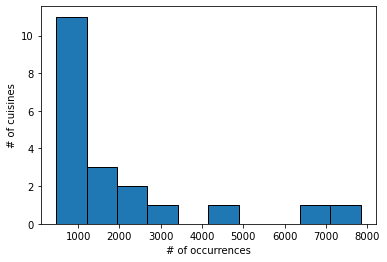

Summary statistics of above graph
            series
count    20.000000
mean   1988.700000
std    2041.558772
min     467.000000
25%     791.750000
50%    1082.000000
75%    2652.750000
max    7838.000000


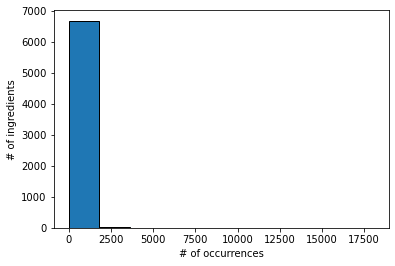

Summary statistics of above graph
             series
count   6714.000000
mean      63.788353
std      388.355948
min        1.000000
25%        1.000000
50%        4.000000
75%       20.000000
max    18049.000000
Average number of ingredients per recipe: 10.76771257605471
Std. dev. number of ingredients per recipe: 4.428921893064523


In [6]:
# Let us do the training set first
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
cuisines = set()
ingredients = set()

cuisine_count_map = {}
ingredient_count_map = {}

num_ingredients_per_recipe = []

def show_hist_of_dict(count_map, y_label, x_label):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.hist(count_map.values(), ec='black')
    plt.show()
    
    # print summary statistics
    print('Summary statistics of above graph')
    series = {'series': pd.Series(count_map.values())}
    data_frame = pd.DataFrame(series)
    print(data_frame.describe())


with open('./train.json', 'r') as file:
    data = json.load(file)    
    # print number of recipes
    print('Total number of recipes: {}'.format(len(data)))    
    for recipe in data:    
        # stats on number of cuisines
        cuisines.add(recipe['cuisine'])
        if recipe['cuisine'] not in cuisine_count_map:
            cuisine_count_map[recipe['cuisine']] = 0
        cuisine_count_map[recipe['cuisine']] += 1        
        # stats on number of ingredients
        num_ingredients_per_recipe.append(len(recipe['ingredients']))
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)            
            if ingredient not in ingredient_count_map:
                ingredient_count_map[ingredient] = 0
            ingredient_count_map[ingredient] += 1    
    print('Number of cuisines: {}'.format(len(cuisines)))
    print('Cuisine count map: \n')
    for cuisine in cuisine_count_map:
        print('{:>15}: {}'.format(cuisine, cuisine_count_map[cuisine]))
    print('\n')
    print('Number of ingredients: {}'.format(len(ingredients)))
    print('Ingredient count map: \n')
    for ingredient in ingredient_count_map:
        print('{:>25}: {}'.format(ingredient, ingredient_count_map[ingredient]))
    print('\n')
    # show histogram of ingredients and cuisines
    show_hist_of_dict(cuisine_count_map, '# of cuisines', '# of occurrences')
    show_hist_of_dict(ingredient_count_map, '# of ingredients', '# of occurrences')
 
    # print average number of ingredients per recipe
    print('Average number of ingredients per recipe: {}'.format(np.mean(num_ingredients_per_recipe)))
    print('Std. dev. number of ingredients per recipe: {}'.format(np.std(num_ingredients_per_recipe)))

Total number of recipes: 9944
Number of ingredients: 4484


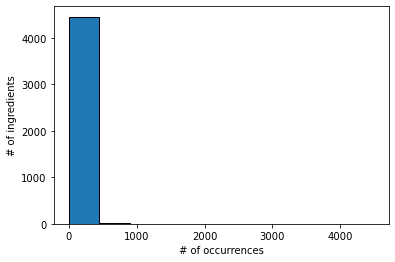

Summary statistics of above graph
            series
count  4484.000000
mean     23.950714
std     117.785328
min       1.000000
25%       1.000000
50%       3.000000
75%      11.000000
max    4485.000000
Statistics on number of ingredients per recipe:
Average number of ingredients per recipe: 10.799979887369268
Std. dev. number of ingredients per recipe: 4.466929073709953
            series
count  9944.000000
mean     10.799980
std       4.467154
min       1.000000
25%       8.000000
50%      10.000000
75%      13.000000
max      50.000000


In [4]:
# Test data
ingredients = set()
ingredient_count_map = {}
num_ingredients_per_recipe = []

def show_hist_of_dict(count_map, y_label, x_label):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.hist(count_map.values(), ec='black')
    plt.show()
    
    # print summary statistics
    print('Summary statistics of above graph')
    series = {'series': pd.Series(count_map.values())}
    data_frame = pd.DataFrame(series)
    print(data_frame.describe())


with open('./test.json', 'r') as file:
    data = json.load(file)
    
    # print number of recipes
    print('Total number of recipes: {}'.format(len(data)))
    
    for recipe in data:            
        # stats on number of ingredients
        num_ingredients_per_recipe.append(len(recipe['ingredients']))
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)
            
            if ingredient not in ingredient_count_map:
                ingredient_count_map[ingredient] = 0
            ingredient_count_map[ingredient] += 1
    
    print('Number of ingredients: {}'.format(len(ingredients)))
    
    # show histogram of ingredients and cuisines
    show_hist_of_dict(ingredient_count_map, '# of ingredients', '# of occurrences')
    
    # print average number of ingredients per recipe
    print('Statistics on number of ingredients per recipe:')
    print('Average number of ingredients per recipe: {}'.format(np.mean(num_ingredients_per_recipe)))
    print('Std. dev. number of ingredients per recipe: {}'.format(np.std(num_ingredients_per_recipe)))
    series = {'series': pd.Series(num_ingredients_per_recipe)}
    data_frame = pd.DataFrame(series)
    print(data_frame.describe())

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
import json
f = open('train.json', 'r')
recipes_train_txt = f.read()
recipes_train_json = json.loads(recipes_train_txt)
#get list of ingredients
ingredients = set()
ingredients_matrix = []
for recipe in recipes_train_json:
    ingredients_matrix.append(recipe["ingredients"])
    for ingred in recipe["ingredients"]:
        ingredients.add(ingred)
ingredients = list(ingredients)
ingredients.sort() #it made my life easier to have it sorted when i needed to check what is what in the encoded vector
values = array(ingredients) 
label_encoder = LabelEncoder()
#gives a unique int value for each string ingredient, and saves the #mapping. you need that for the encoder. something like: 
#['banana'] -> [1]
integer_encoded = label_encoder.fit_transform(values) 

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#here you encode something like : [2] -> [0,1,0,0,...]
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
def transform_value(s):
    
    l = array([s])
    integer_encoded = label_encoder.transform(l)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.transform(integer_encoded)
    
    return onehot_encoded[0]

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np

Init Plugin
Init Graph Optimizer
Init Kernel


In [ ]:
num_input = len(X_Total[0])
num_hidden_l = 700
X = tf.placeholder(“float”, [None, num_input])
w_encoder_h1 =  tf.Variable(tf.random_normal([num_input, num_hidden_l])
w_decoder_h2 = tf.Variable(tf.random_normal([num_hidden_l, num_input]))
encoder_b1 = tf.Variable(tf.random_normal([num_hidden_l]))
decoder_b2 = tf.Variable(tf.random_normal([num_input]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w_encoder_h1),
                                   encoder_b1))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w_decoder_h2),
                                  decoder_b2))
# Prediction
y_pred = layer_2
# Targets (Labels) are the input data.
y_true = X
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)